# IBM HR Analytics Employee Attrition & Performance
## Predict attrition of valuable employees

## Table of Contents

1. [About the data and Problem Statement](#section1)<br>
2. [Importing Packages](#section1)<br>
3. [Data Loading and Description](#section2)<br>
4. [Data Pre-processing](#section1)<br>
5. [Exploratory Data Analysis](#section3)<br>
6. [Correlation](#section1)<br>
7. [Encoding the Features](#section1)<br>
8. [Preparing X and y and Splitting  into training and test datasets.](#section1)<br>
9. [Machine Learning Algorithmns](#section1)<br>
    - 9.1 [Logistic Regression](#section1)<br>
    - 9.1 [KNN Classifier](#section1)<br>
    - 9.1 [Support Vector Machine](#section1)<br>
10. [Predictions](#section1)<br>


# 1. About the data and Problem Statement

- Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.
- Goal:Predicting Employee Attrition(company losing its customer base) Using Machine Learning

# 2. Importing Packages

In [64]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# 3. Data loading and description

In [65]:
dataset = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
dataset.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Description of the dataset
It contains employee attrition data

#### Education

1 - 'Below College'  2 - 'College'  3 - 'Bachelor'  4 - 'Master'  5 - 'Doctor'

#### EnvironmentSatisfaction

1 'Low'  2 'Medium'  3 'High'  4 'Very High'

#### JobInvolvement

1 'Low'  2 'Medium'  3 'High'  4 'Very High'

#### JobSatisfaction

1 'Low'  2 'Medium'  3 'High'  4 'Very High'

#### PerformanceRating

1 'Low'  2 'Good'  3 'Excellent'  4 'Outstanding'

#### RelationshipSatisfaction

1 'Low'  2 'Medium'  3 'High'  4 'Very High'
#### WorkLifeBalance 

1 'Bad'  2 'Good'  3 'Better'  4 'Best'



In [66]:
dataset.shape

(1470, 35)

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

- ```info``` function gives us the following insights of the dataframe:

  - There are a total of **1470  samples (rows)** and **58 columns** in the dataframe.
  
  - All the columns are of **numeric** datatype.
  
  - There are no  **missing** values columns.

In [68]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- ```describe``` function gives us the following insights into the data:
  
  - **Age** and **DailyRate** columns are having an almost **normal distribution** because the **mean** value is close to the **median** value.
  
  - There are no **outliers**.

# 4. Data Pre-processing

In [69]:
dataset.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [73]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# 5. Exploratory Data Analysis

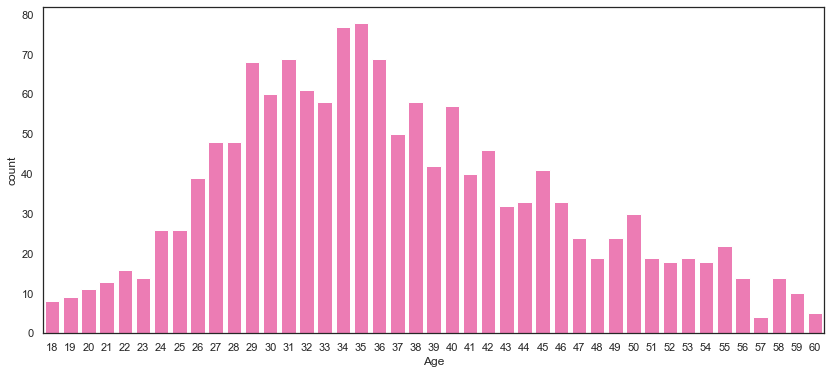

In [80]:
plt.figure(figsize=(14,6))
sns.countplot(dataset.Age,color='hotpink')

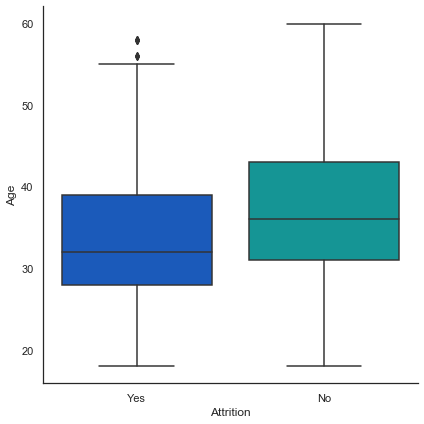

In [81]:
sns.factorplot(data=dataset,y='Age',x='Attrition',size=6,aspect=1,kind='box',palette='winter')

Age: Employees in relatively young age bracket 25-35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.

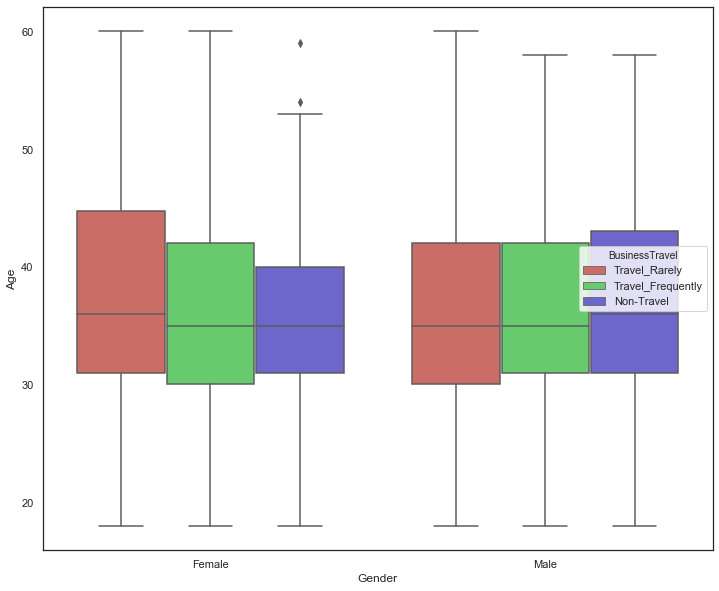

In [82]:
f,ax = plt.subplots(figsize = (12,10))
sns.boxplot(x="Gender",y="Age",hue="BusinessTravel",data=dataset,palette="hls")

BusinessTravel : The workers who travel alot are more likely to quit then other employees

C:\Users\T.R.BASUDE\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


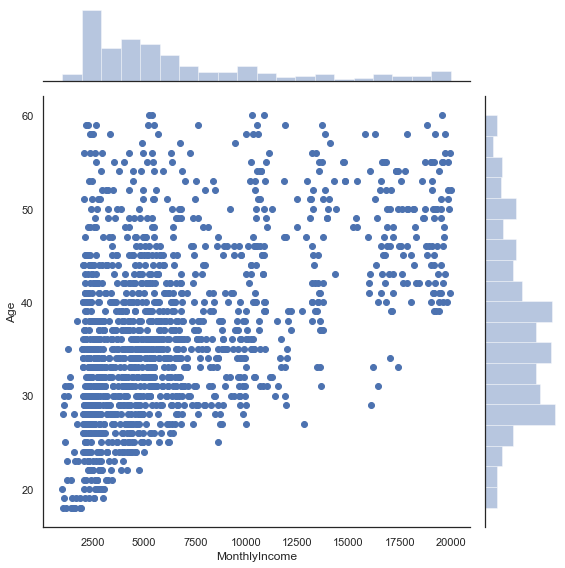

In [78]:
sns.jointplot(dataset.MonthlyIncome ,dataset.Age,size=8, kind = "scatter")   
plt.show()

C:\Users\T.R.BASUDE\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


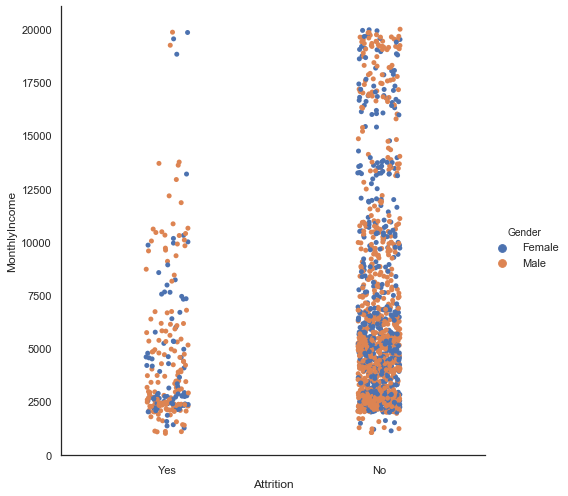

In [79]:
sns.catplot(x="Attrition", y="MonthlyIncome", data=dataset,hue='Gender',size=7)

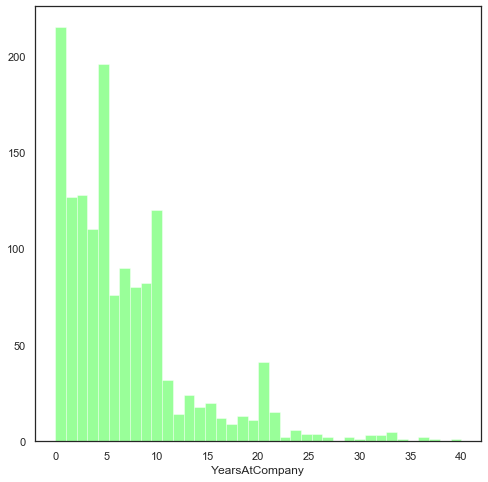

In [91]:
#Distribution of Years at company
plt.figure(figsize=(8,8))
sns.distplot(dataset["YearsAtCompany"].astype(int),color='lime', kde=False);

YearsAtCompany: Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving. A strategic "Retention Plan" should be drawn for each Risk Category group..

In [93]:
dataset['Attrition_ind'] = 0 
dataset.loc[dataset['Attrition'] =='Yes', 'Attrition_ind'] = 1

In [94]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [95]:
continuous_columns = ['Age','DailyRate','DistanceFromHome', 'Education', 'EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike',  'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'] 
data=dataset[continuous_columns]

In [96]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


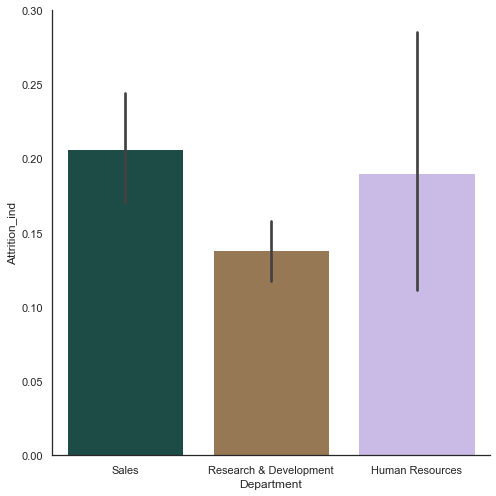

In [100]:
sns.factorplot(data=dataset,x='Department',y='Attrition_ind',size=7,aspect=1,kind='bar',palette='cubehelix')

Department : The worker in Research & Development are more likely to stay then the workers on other departement.

### Education

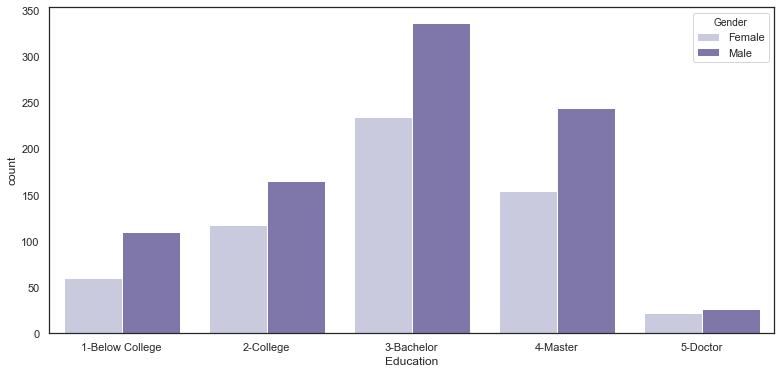

In [102]:
plt.figure(figsize=(13,6))
ax = sns.countplot(data=dataset,x='Education',hue='Gender',palette='Purples')
ax.set_xticklabels([ '1-Below College' , '2-College' , '3-Bachelor' ,'4-Master',  '5-Doctor'])
plt.show()

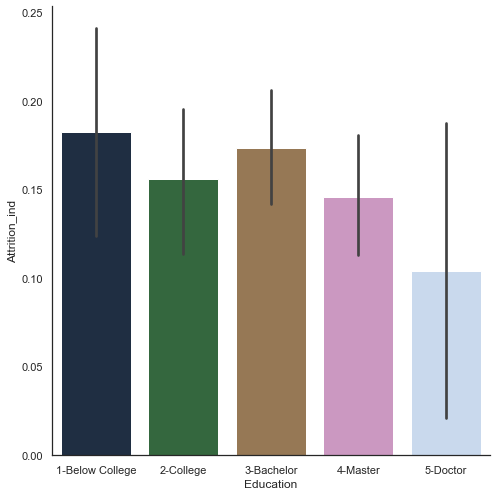

In [103]:
ax=sns.factorplot(data=dataset,x='Education',y='Attrition_ind',size=7,aspect=1,kind='bar',palette="cubehelix")
ax.set_xticklabels([ '1-Below College' , '2-College' , '3-Bachelor' ,'4-Master',  '5-Doctor'])

Employees qualified as Below college and Bachelor Education tend to leave the company than others.

Text(0.5, 1.0, 'Education Field Counts')

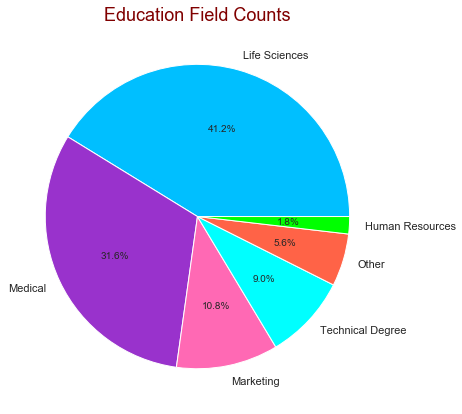

In [104]:
labels=dataset.EducationField.value_counts().index
sizes=dataset.EducationField.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=["deepskyblue","darkorchid","hotpink","cyan","tomato","lime"],autopct="%1.1f%%")
plt.title("Education Field Counts",fontsize=18,color='maroon')

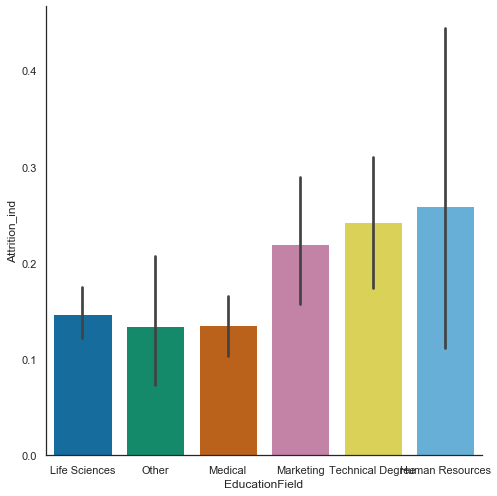

In [107]:
x=sns.factorplot(data=dataset,x='EducationField',y='Attrition_ind',size=7,aspect=1,kind='bar')

*EducationField *: The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

### Job Satisfaction

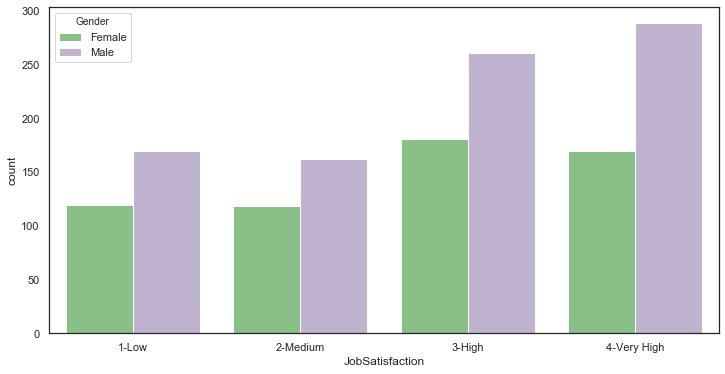

In [108]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=dataset,x='JobSatisfaction',hue='Gender',palette='Accent')
ax.set_xticklabels([ '1-Low' , '2-Medium' , '3-High' , '4-Very High'])
plt.show()

[Text(0, 0, '1-Low'),
 Text(0, 0, '2-Medium'),
 Text(0, 0, '3-High'),
 Text(0, 0, '4-Very High')]

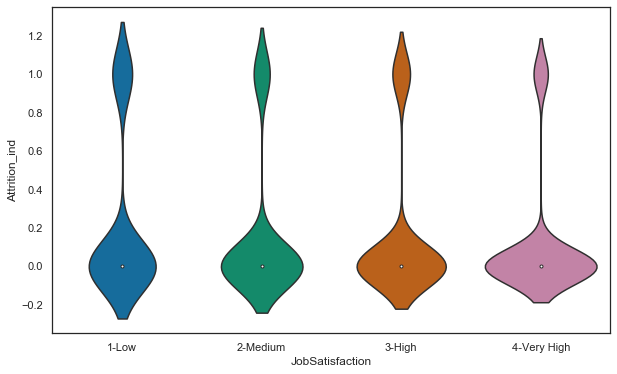

In [109]:
plt.figure(figsize=(10,6))
ax=sns.violinplot(data=dataset,x='JobSatisfaction',y='Attrition_ind');
ax.set_xticklabels([ '1-Low' , '2-Medium' , '3-High' , '4-Very High'])

Low Environment satisfaction and Job satisfaction  people more likly to leave the company.

### Monthly Income vs Job role,Job Level,Department

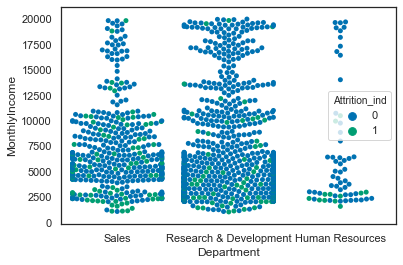

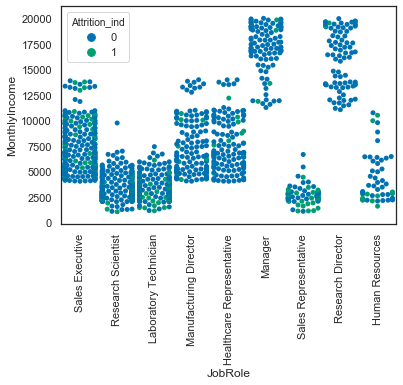

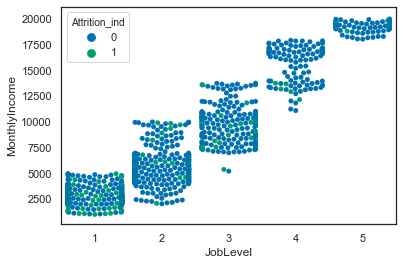

In [110]:
sns.swarmplot(x="Department", y="MonthlyIncome", hue="Attrition_ind", data=dataset);
plt.show()

sns.swarmplot(x="JobRole", y="MonthlyIncome", hue="Attrition_ind", data=dataset);
plt.xticks( rotation=90 )
plt.show()


sns.swarmplot(x="JobLevel", y="MonthlyIncome", hue="Attrition_ind", data=dataset);
plt.show()

In [111]:
age=pd.DataFrame(dataset.groupby("Age")[["MonthlyIncome","DailyRate","MonthlyRate",'HourlyRate']].mean())
age["Count"]=dataset.Age.value_counts(dropna=False)
age.reset_index(level=0, inplace=True)
age.head()

,Age,MonthlyIncome,DailyRate,MonthlyRate,HourlyRate,Count
0,18,1518.375000,747.625000,14476.000000,68.125000,8
1,19,2075.000000,548.444444,15119.666667,63.555556,9
2,20,2539.363636,819.454545,16480.909091,61.909091,11
3,21,2491.461538,762.846154,17268.923077,67.307692,13
4,22,2950.000000,806.937500,14424.125000,69.812500,16


Text(0.5, 1.0, 'General Statistics of Rate')

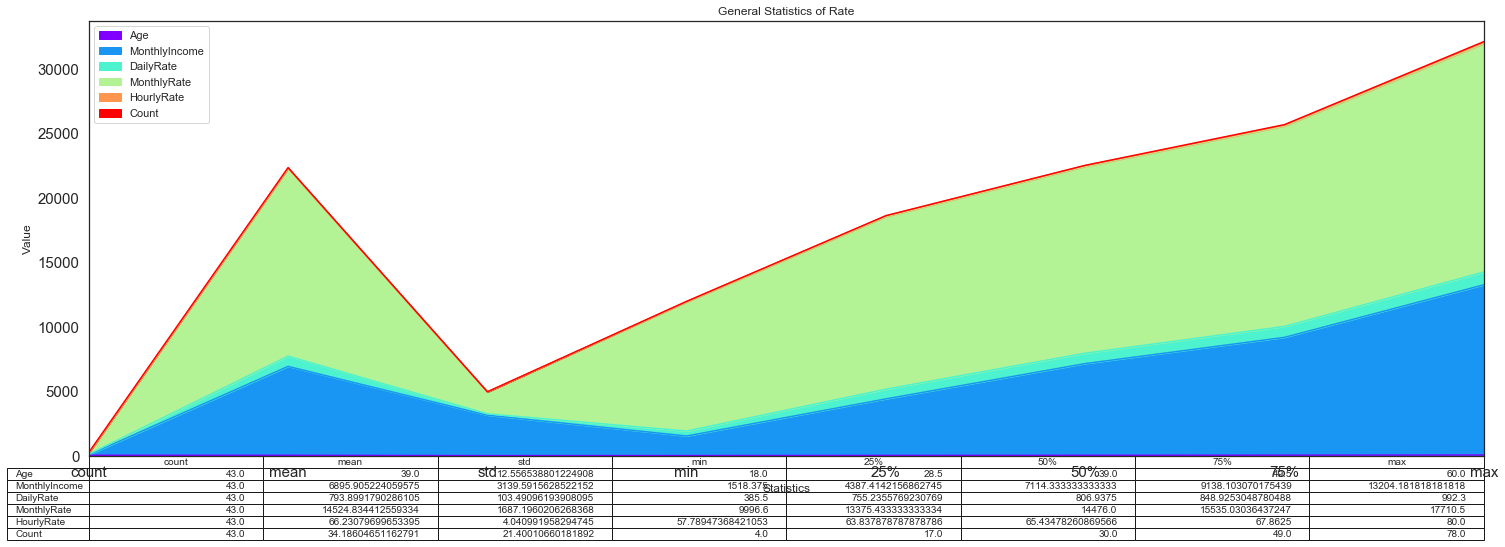

In [112]:
age.describe().plot(kind = "area",fontsize=15, figsize = (25,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Rate")

# 6. Correlation

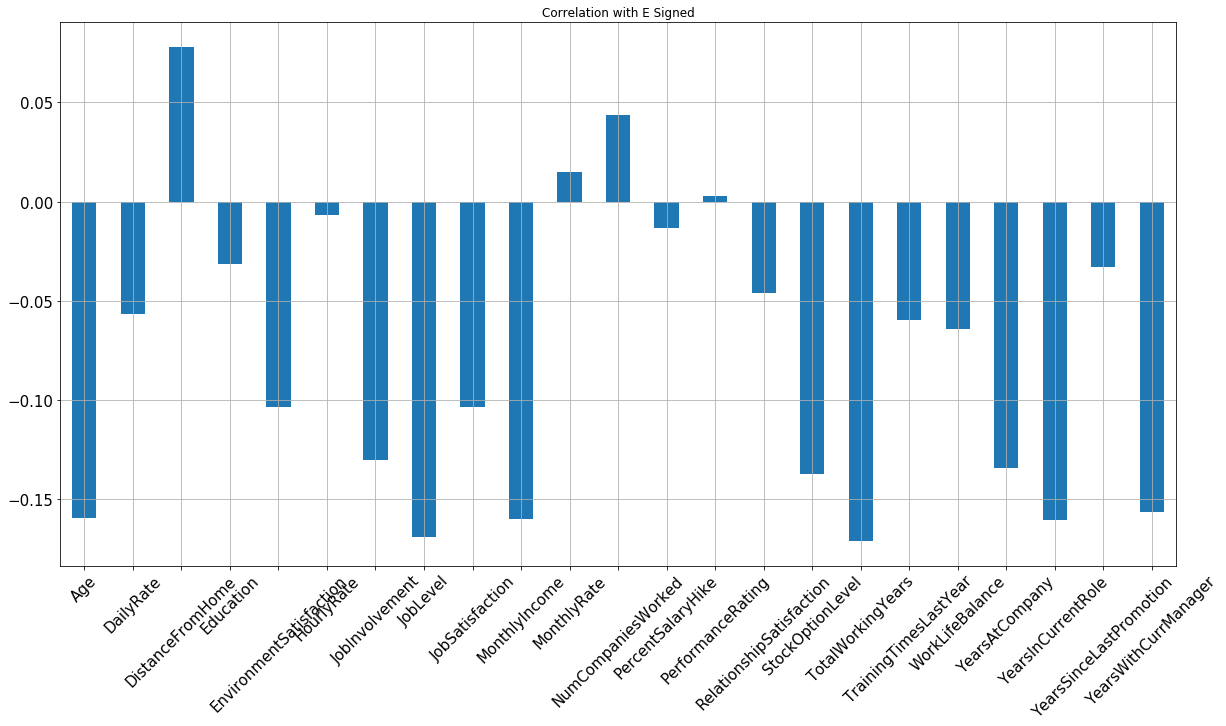

In [13]:
data.corrwith(dataset.Attrition_ind).plot.bar(
        figsize = (20, 10), title = "Correlation with E Signed", fontsize = 15,
        rot = 45, grid = True)

In [14]:
## Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = dataset.corr()
corr.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 7. Encoding the Features

In [15]:
# One Hot Encoding
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_ind',
       'Attrition_No', 'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Techni

In [16]:
data_main=dataset.drop(['EmployeeCount',
       'EmployeeNumber','Over18_Y','StandardHours','Attrition_No', 'Attrition_Yes'],axis=1)
data_main.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


In [17]:
data_main.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_ind',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'Jo

In [18]:
data_main['Attrition']=data_main['Attrition_ind']
data_main.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,1,0,0,0,1,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,1,0,0,0,1,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,1,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,1,0,0,0,1,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,1,0,1,0,0


In [19]:
data_main=data_main.drop(['Attrition_ind'],axis=1)
data_main.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

# 8. Preparing X and y and Splitting into training and test datasets

## Preparing X and y using pandas

In [20]:
X=data_main.drop('Attrition',axis=1)
y=data_main.Attrition

In [21]:
features_label = data_main.columns[:-1]

## Splitting X and y into training and test datasets.

In [22]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

# 9. Machine Learning Algorithmns

## 9.1 Logistic Regression

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [26]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.54%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
f1-score     0.940146    0.585859  0.895408     0.763002      0.883508
precision    0.905342    0.798165  0.895408     0.851754      0.888208
recall       0.977733    0.462766  0.895408     0.720249      0.895408
support    988.000000  188.000000  0.895408  1176.000000   1176.000000
_______________________________________________
Confusion Matrix: 
 [[966  22]
 [101  87]]

Test Result:
Accuracy Score: 88.44%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
f1-score     0.933071   0.575000  0.884354    0.754035      0.873392
precision    0.901141   0.741935  0.884354    0.821538      0.874606
recall       0.967347   0.469388  0.884354    0.718367      0.884354
support    245.000000  49.000000  0.884354  294.000000    294.

In [27]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.540816,88.435374


## 9.2 K-nearest neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.50%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
f1-score     0.930166    0.404858     0.875     0.667512      0.846188
precision    0.876455    0.847458     0.875     0.861956      0.871819
recall       0.990891    0.265957     0.875     0.628424      0.875000
support    988.000000  188.000000     0.875  1176.000000   1176.000000
_______________________________________________
Confusion Matrix: 
 [[979   9]
 [138  50]]

Test Result:
Accuracy Score: 84.69%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
f1-score     0.913958   0.307692  0.846939    0.610825      0.812914
precision    0.859712   0.625000  0.846939    0.742356      0.820594
recall       0.975510   0.204082  0.846939    0.589796      0.846939
support    245.000000  49.000000  0.846939  294.000000    294.

In [29]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.540816,88.435374
1,K-nearest neighbors,87.500000,84.693878


## 9.3 Support Vector machine

In [30]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.57%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
f1-score     0.997476    0.986523  0.995748     0.991999      0.995725
precision    0.994965    1.000000  0.995748     0.997482      0.995770
recall       1.000000    0.973404  0.995748     0.986702      0.995748
support    988.000000  188.000000  0.995748  1176.000000   1176.000000
_______________________________________________
Confusion Matrix: 
 [[988   0]
 [  5 183]]

Test Result:
Accuracy Score: 83.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0     1  accuracy   macro avg  weighted avg
f1-score     0.909091   0.0  0.833333    0.454545      0.757576
precision    0.833333   0.0  0.833333    0.416667      0.694444
recall       1.000000   0.0  0.833333    0.500000      0.833333
support    245.000000  49.0  0.833333  294.000000    294.000000
__________________

C:\Users\T.R.BASUDE\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.540816,88.435374
1,K-nearest neighbors,87.500000,84.693878
2,Support Vector Machine,99.574830,83.333333


# 10. Predictions

In [35]:
 x2 = {'Age' : [41, 54, 38], 'DailyRate' :[398, 745, 1228],'DistanceFromHome' :[5, 2, 7], 'Education':[2, 4, 3],
       'EnvironmentSatisfaction' :[2, 4, 1], 'HourlyRate':[60, 87, 44], 'JobInvolvement' :[2, 3, 3], 'JobLevel':[2, 1, 2],
       'JobSatisfaction' :[2, 4, 3], 'MonthlyIncome' :[2909, 3454, 5666], 'MonthlyRate' :[13454, 8344, 16570],
       'NumCompaniesWorked':[3, 4, 2], 'PercentSalaryHike' :[23, 17, 15], 'PerformanceRating' :[4, 3, 3], 
       'RelationshipSatisfaction':[2, 1, 3], 'StockOptionLevel':[3, 1, 2], 'TotalWorkingYears' :[12, 9, 10], 
       'TrainingTimesLastYear':[2, 3, 2], 'WorkLifeBalance': [3, 2, 2], 'YearsAtCompany':[6, 8, 8],  
       'YearsInCurrentRole':[5, 6, 4], 'YearsSinceLastPromotion': [3, 4, 1], 'YearsWithCurrManager':[2, 5, 2],
       'BusinessTravel_Non-Travel':[0, 0, 0], 'BusinessTravel_Travel_Frequently':[0, 1, 0],
       'BusinessTravel_Travel_Rarely':[1, 0, 1], 'Department_Human Resources' : [0, 0, 0],
       'Department_Research & Development' :[1, 0, 0], 'Department_Sales':[0, 1, 1],
       'EducationField_Human Resources' :[0, 0, 0], 'EducationField_Life Sciences' :[0 ,0, 0],
       'EducationField_Marketing' :[0, 1, 1], 'EducationField_Medical' :[0, 0, 0],
       'EducationField_Other':[0, 0, 0], 'EducationField_Technical Degree' :[1, 0, 0],
       'Gender_Female':[1, 0, 0], 'Gender_Male':[0, 1, 1], 'JobRole_Healthcare Representative': [0, 0, 0],
       'JobRole_Human Resources':[0, 0, 0], 'JobRole_Laboratory Technician':[1, 0, 0],
       'JobRole_Manager' :[0, 1, 0], 'JobRole_Manufacturing Director' :[0, 0, 0],
       'JobRole_Research Director':[0, 0, 0], 'JobRole_Research Scientist':[0, 0, 0],
       'JobRole_Sales Executive':[0, 0, 1], 'JobRole_Sales Representative':[0, 0, 0],
       'MaritalStatus_Divorced':[1, 0, 0], 'MaritalStatus_Married':[0, 1, 1],
       'MaritalStatus_Single':[0, 0, 0], 'OverTime_No':[1, 1, 0], 'OverTime_Yes':[0, 0, 1]}

In [36]:
x3=pd.DataFrame(x2)
x3

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,398,5,2,2,60,2,2,2,2909,...,0,0,0,0,0,1,0,0,1,0
1,54,745,2,4,4,87,3,1,4,3454,...,0,0,0,0,0,0,1,0,1,0
2,38,1228,7,3,1,44,3,2,3,5666,...,0,0,0,1,0,0,1,0,0,1


In [37]:
pred2 = lr_clf.predict(x3)
pred2

array([1, 1, 1], dtype=int64)

The above prediction done by logistic regression says that all the employee has high attrition i.e., they may leave the company

In [38]:
pred2 = knn_clf.predict(x3)
pred2


array([0, 0, 0], dtype=int64)

The above prediction done by KNN classifier says that all the employee has low attrition i.e., they may stay in the same company

In [39]:
pred2 = svm_clf.predict(x3)
pred2

array([0, 0, 0], dtype=int64)

The above prediction done by SVM classifier says that all the employee has low attrition i.e., they may stay in the same company